Імпортуємо необхідні бібліотеки

In [1]:
import datetime
import pandas as pd
import numpy as np
import missingno

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploratory data analysis

 1.	Завантажила дані (таблицю із заданим набором даних) до середовища програмування Python.

In [2]:
carsales = pd.read_csv('Car sales.csv')

In [3]:
# подивимося на перші 10 рядків
carsales.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [4]:
# і на останні 10
carsales.tail(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
147,Volkswagen,Passat,51.102,16.725,Passenger,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,10/30/2012,61.701381
148,Volkswagen,Cabrio,9.569,16.575,Passenger,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,5/31/2011,48.907372
149,Volkswagen,GTI,5.596,13.760,Passenger,17.50,2.0,115.0,98.9,68.3,163.3,2.762,14.6,26.0,4/1/2011,47.946841
150,Volkswagen,Beetle,49.463,NaN,Passenger,15.90,2.0,115.0,98.9,67.9,161.1,2.769,14.5,26.0,10/20/2011,47.329632
151,Volvo,S40,16.957,NaN,Passenger,23.40,1.9,160.0,100.5,67.6,176.6,2.998,15.8,25.0,2/18/2011,66.113057
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357
156,Volvo,S80,18.969,NaN,Passenger,36.00,2.9,201.0,109.9,72.1,189.8,3.600,21.1,24.0,11/14/2011,85.735655


#### 2.	Провести первинний аналіз структури і якості даних. 

#### 3.	Здійснити загальний опис даних, що містяться у таблиці: яке явище або процес відображають дані; які є змінні у таблиці; кількість спостережень; наявність пропущених або потенційно некоректних спостережень; формат даних для кожної змінної.

In [5]:
carsales.shape
# кількість рядків та стовпців

(157, 16)

In [6]:
carsales.info()
# бачимо:
# 1. які є змінні(це наші колонки), 
# 2. кількість спостережень по кожній змінній(бачимо, що не усюди ця цифра = кількості колонок, отже є пропущені значення), 
# 3. тип даних(data type = object, float)                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [7]:
# перейменуємо для нормального вигляду
carsales = carsales.rename(columns={'__year_resale_value': 'Year_resale_value'})

In [8]:
#змінимо тип даних колонки Latest_Launch з рядка на дейттайм
carsales['Latest_Launch'] = pd.to_datetime(carsales.Latest_Launch, format='%m/%d/%Y')
carsales.Latest_Launch.info

<bound method Series.info of 0     2012-02-02
1     2011-06-03
2     2012-01-04
3     2011-03-10
4     2011-10-08
         ...    
152   2011-09-21
153   2012-11-24
154   2011-06-25
155   2011-04-26
156   2011-11-14
Name: Latest_Launch, Length: 157, dtype: datetime64[ns]>

In [9]:
# подивимося, яка кількість пустих значень
carsales.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
Year_resale_value     36
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64

<AxesSubplot:>

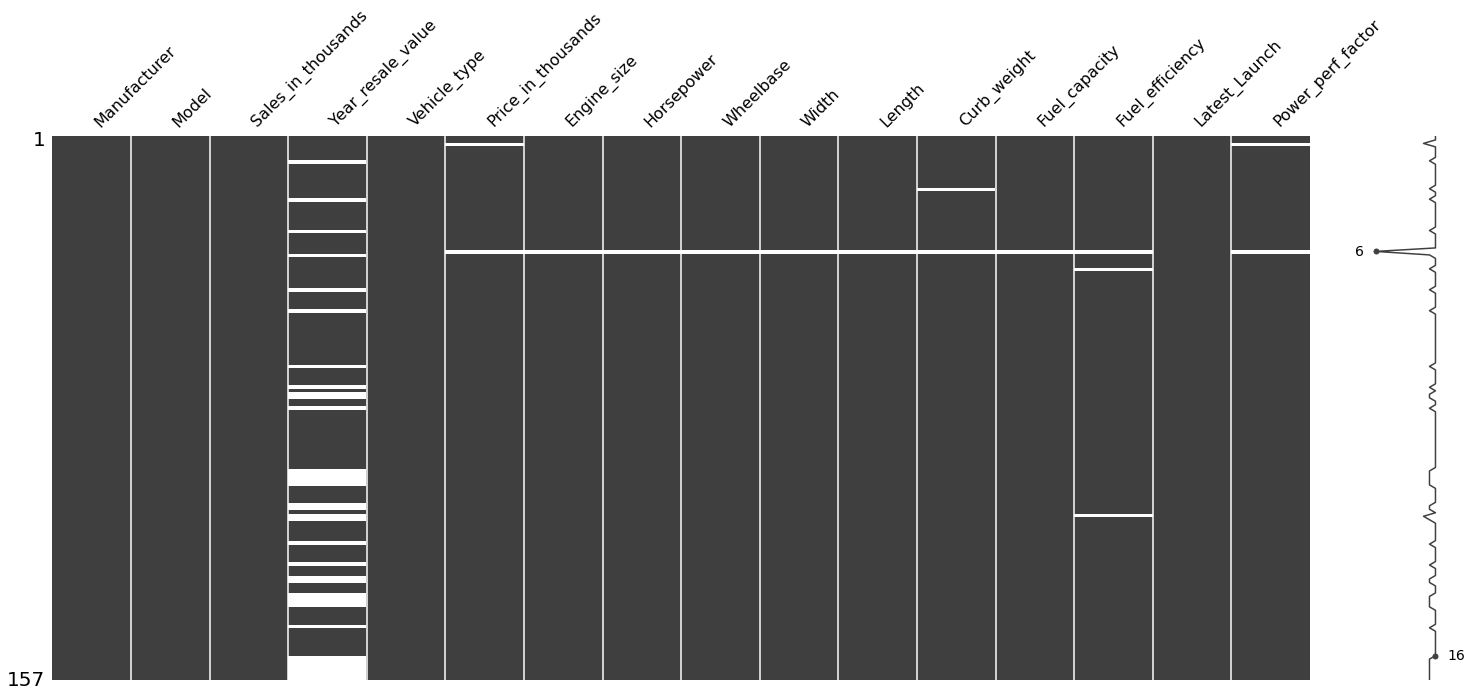

In [10]:
missingno.matrix(carsales)

#### 4. Здійснити очищення й трансформацію вхідних даних, підготувавши їх до статистичного аналізу.

Замінимо пусті значення через медіану

In [11]:
carsales["Year_resale_value"].fillna(carsales["Year_resale_value"].median(), inplace=True)
carsales["Price_in_thousands"].fillna(carsales["Price_in_thousands"].median(), inplace=True)
carsales["Engine_size"].fillna(carsales["Engine_size"].median(), inplace=True)
carsales["Horsepower"].fillna(carsales["Horsepower"].median(), inplace=True)
carsales["Wheelbase"].fillna(carsales["Wheelbase"].median(), inplace=True)
carsales["Width"].fillna(carsales["Width"].median(), inplace=True)
carsales["Length"].fillna(carsales["Length"].median(), inplace=True)
carsales["Curb_weight"].fillna(carsales["Curb_weight"].median(), inplace=True)
carsales["Fuel_capacity"].fillna(carsales["Fuel_capacity"].median(), inplace=True)
carsales["Fuel_efficiency"].fillna(carsales["Fuel_efficiency"].median(), inplace=True)
carsales["Power_perf_factor"].fillna(carsales["Power_perf_factor"].median(), inplace=True)

Перевіримо:

In [12]:
carsales.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
Year_resale_value     0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

<AxesSubplot:>

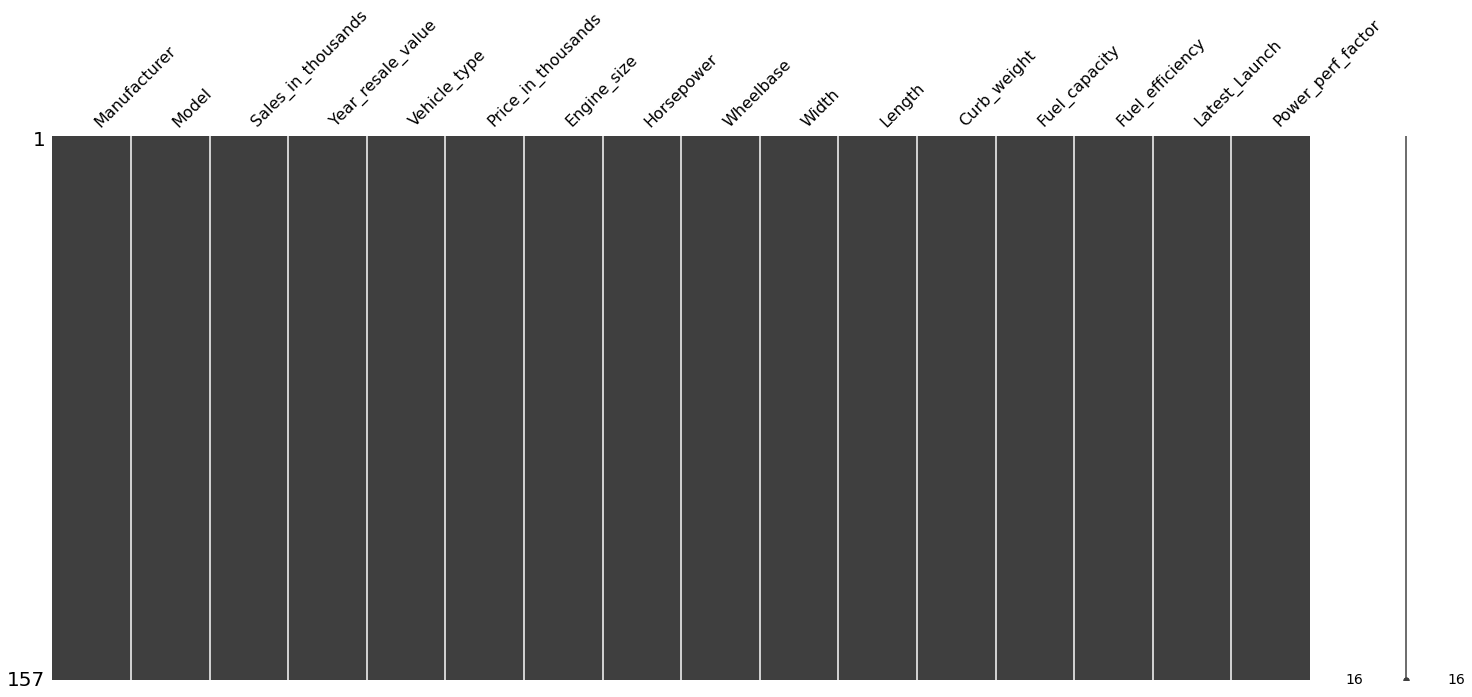

In [13]:
missingno.matrix(carsales)

Перевіримо на дублікати у даних:

In [14]:
carsales.duplicated().sum()

0

#### Аутлайєри(викиди)

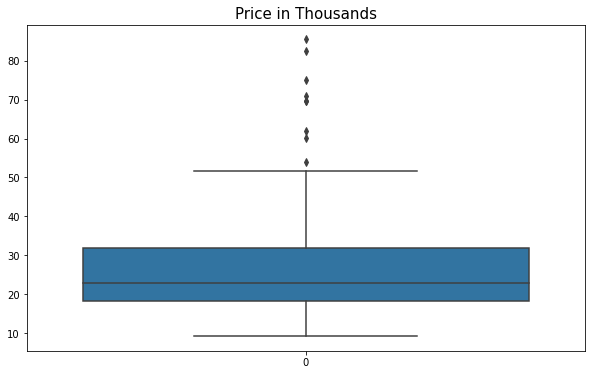

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(carsales["Price_in_thousands"])
plt.title("Price in Thousands", size=15)
plt.show()

Inter-quartile Range (IQR)
- IQR = Q3-Q1
- Lower Boundary = Q1 - 1.5 * IQR
- Upper Boundary = Q3 + 1.5 * IQR

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [17]:
lowerprice, upperprice = remove_outlier(carsales["Price_in_thousands"])
carsales["Price_in_thousands"] = np.where(carsales["Price_in_thousands"] > upperprice, upperprice, carsales["Price_in_thousands"])
carsales["Price_in_thousands"] = np.where(carsales["Price_in_thousands"] < lowerprice, lowerprice, carsales["Price_in_thousands"])

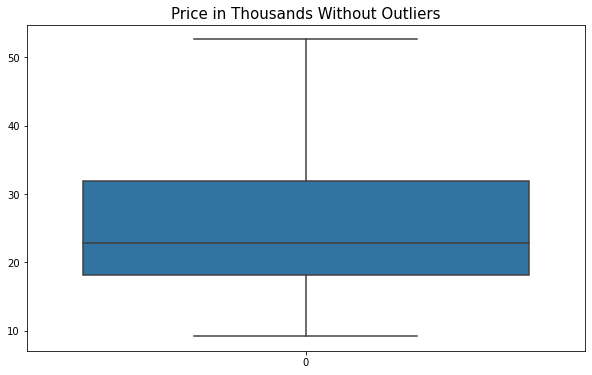

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(carsales["Price_in_thousands"])
plt.title("Price in Thousands Without Outliers", size=15)
plt.show()

#### 5.	Описова статистика: представити основні параметри, що характеризують розподіл кожної змінної.

In [19]:
carsales.describe().T
# T - транспонування(як у матрицях), просто для зручності огляду

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
Year_resale_value,157.0,17.180318,10.178562,5.160000,12.545000,14.180000,18.140000,67.550000
Price_in_thousands,157.0,26.337627,11.367896,9.235000,18.145000,22.799000,31.930000,52.607500
Engine_size,157.0,3.060510,1.041311,1.000000,2.300000,3.000000,3.500000,8.000000
Horsepower,157.0,185.894904,56.522319,55.000000,150.000000,177.500000,215.000000,450.000000
Wheelbase,157.0,107.484076,7.616872,92.600000,103.000000,107.000000,112.200000,138.700000
Width,157.0,71.146178,3.441124,62.600000,68.400000,70.550000,73.400000,79.900000
Length,157.0,187.347134,13.388708,149.400000,177.600000,187.900000,196.100000,224.500000
Curb_weight,157.0,3.377567,0.626460,1.895000,2.975000,3.342000,3.778000,5.572000
Fuel_capacity,157.0,17.947134,3.875905,10.300000,15.800000,17.200000,19.500000,32.000000


#### 6. Розрахувати допоміжні показники/змінні (на основі тих показників, що наявні у первинній таблиці).

In [20]:
carsales.head()

,Manufacturer,Model,Sales_in_thousands,Year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778
2,Acura,CL,14.114,18.225,Passenger,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,72.030917
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639


##### Earned amount from sales of each model

In [21]:
carsales['earned_sum'] = carsales.Sales_in_thousands * carsales.Price_in_thousands

##### Car age

In [22]:
carsales['year'] = carsales['Latest_Launch'].dt.year
carsales['Age'] = 2022 - carsales['year']
carsales.head()

,Manufacturer,Model,Sales_in_thousands,Year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,earned_sum,year,Age
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2012-02-02,58.280150,363.758500,2012,10
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,2011-06-03,91.370778,1118.505600,2011,11
2,Acura,CL,14.114,18.225,Passenger,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,2012-01-04,72.030917,321.785086,2012,10
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2011-03-10,91.389779,360.696000,2011,11
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,2011-10-08,62.777639,489.324030,2011,11


In [23]:
# видалимо непотрібні нам колонки
carsales.drop(['Latest_Launch'], axis=1, inplace=True)
carsales.drop(['year'], axis=1, inplace=True)

In [24]:
carsales.head()

,Manufacturer,Model,Sales_in_thousands,Year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,earned_sum,Age
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,363.758500,10
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,1118.505600,11
2,Acura,CL,14.114,18.225,Passenger,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,72.030917,321.785086,10
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,360.696000,11
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,489.324030,11


#### 7.	Здійснити кореляційний і візуальний аналіз даних, побудувавши таблиці й графіки у різноманітних розрізах, які найкраще характеризують відповідну вибірку. 

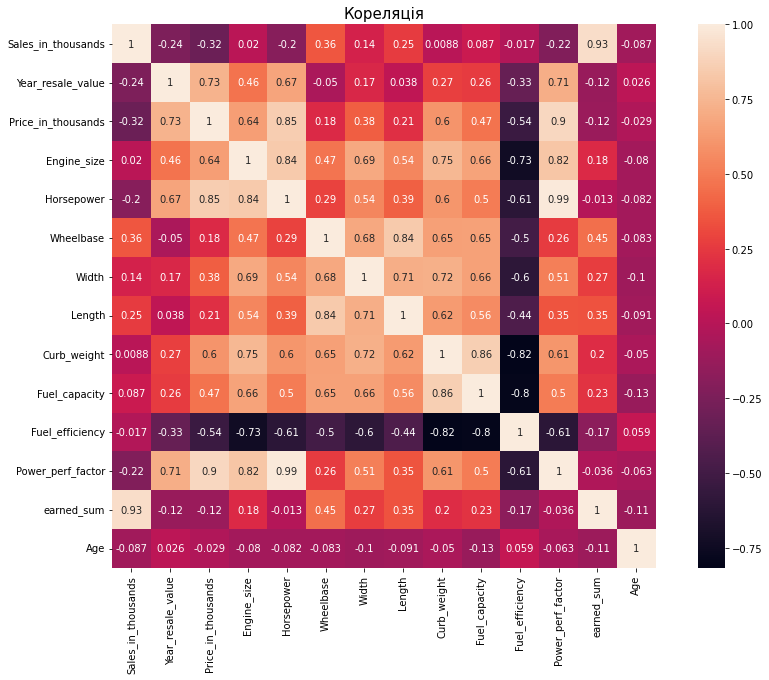

In [41]:
plt.figure(figsize=(15, 10))
sns.heatmap(carsales.corr(), annot=True, square=True)
plt.title("Кореляція", size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

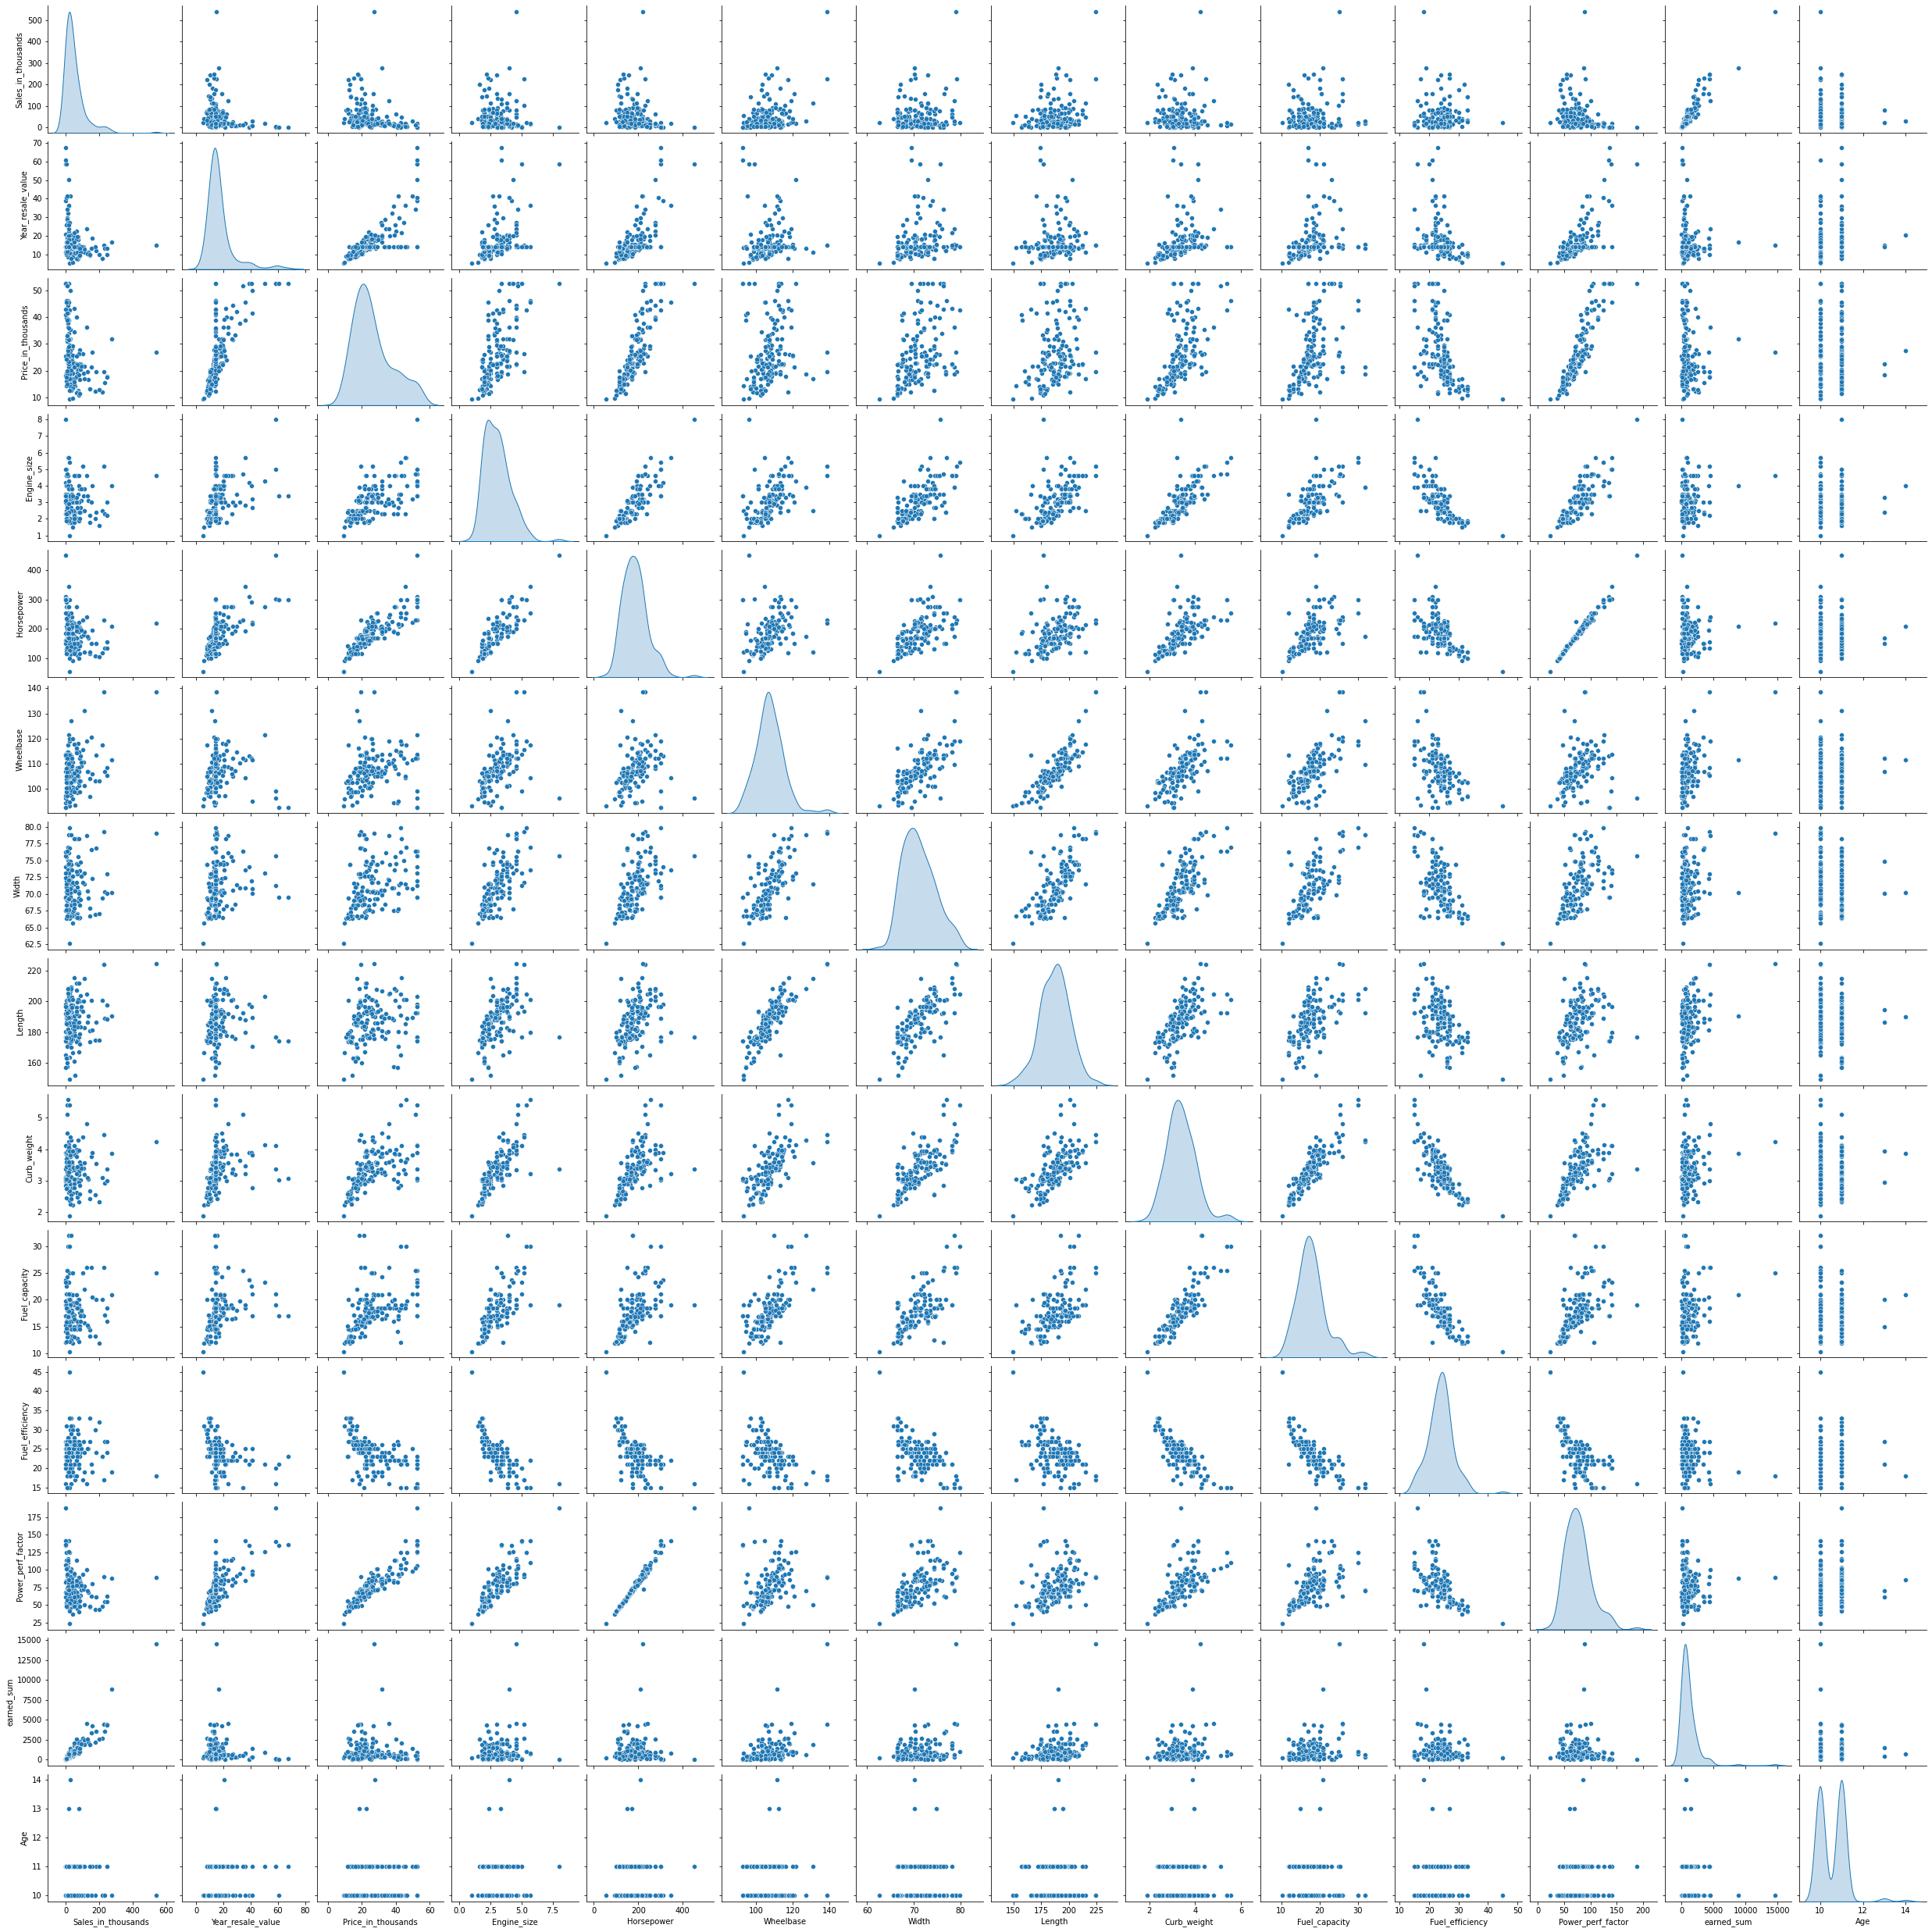

In [26]:
sns.pairplot(carsales, diag_kind='kde')

#### Manufacturer

In [27]:
carsales.agg({'Manufacturer':'value_counts'})
# aggregate

,Manufacturer
Dodge,11
Ford,11
Toyota,9
Chevrolet,9
Mercedes-B,9
Mitsubishi,7
Nissan,7
Chrysler,7
Volvo,6
Oldsmobile,6


<AxesSubplot:xlabel='Manufacturer', ylabel='Count'>

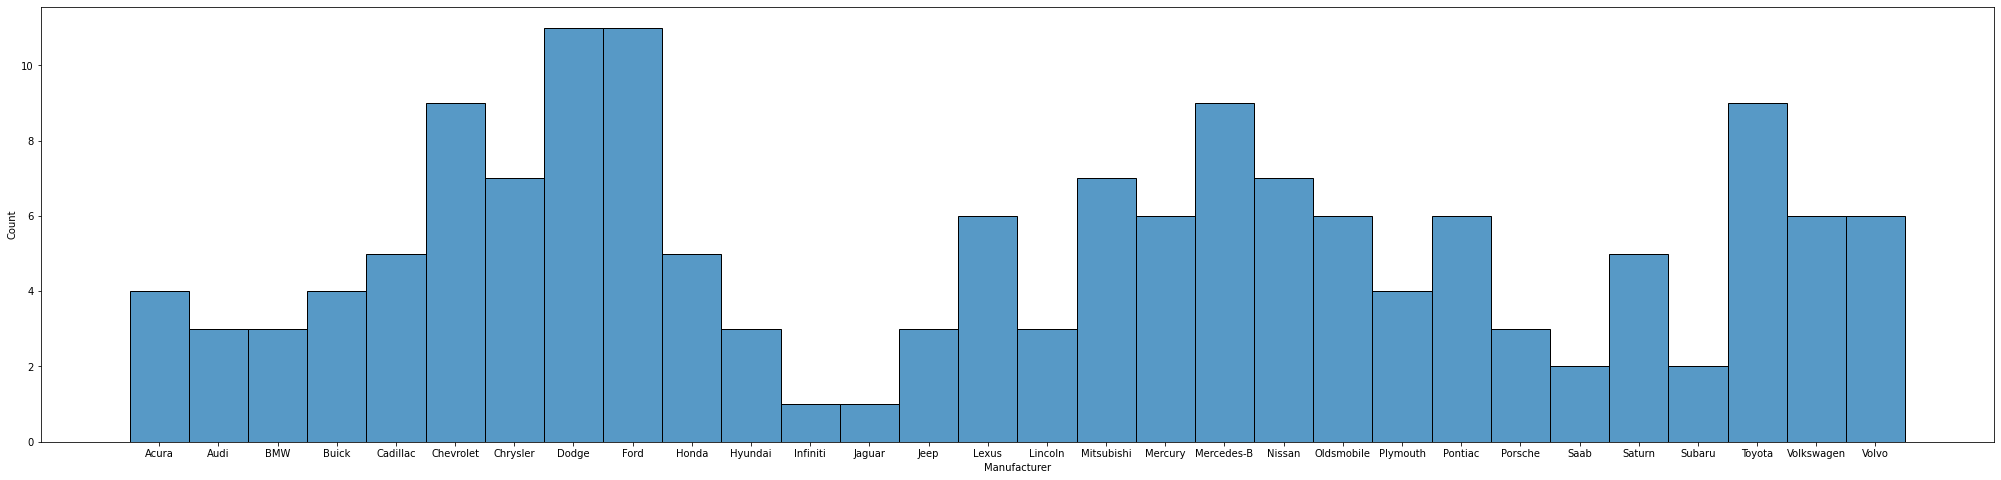

In [28]:
plt.figure(figsize=(35, 8))
sns.histplot(data=carsales, x='Manufacturer')

In [29]:
mean_price_manufacturer = carsales[['Manufacturer', 'Price_in_thousands']].groupby('Manufacturer', as_index=True).mean()
mean_price_manufacturer.rename(columns={'Price_in_thousands': 'Price_in_thousands_mean'})

,Price_in_thousands_mean
Manufacturer,
Acura,28.674750
Audi,36.849167
BMW,33.096667
Buick,26.781250
Cadillac,40.254000
Chevrolet,20.022778
Chrysler,23.340571
Dodge,22.657500
Ford,21.047273


<AxesSubplot:xlabel='Manufacturer'>

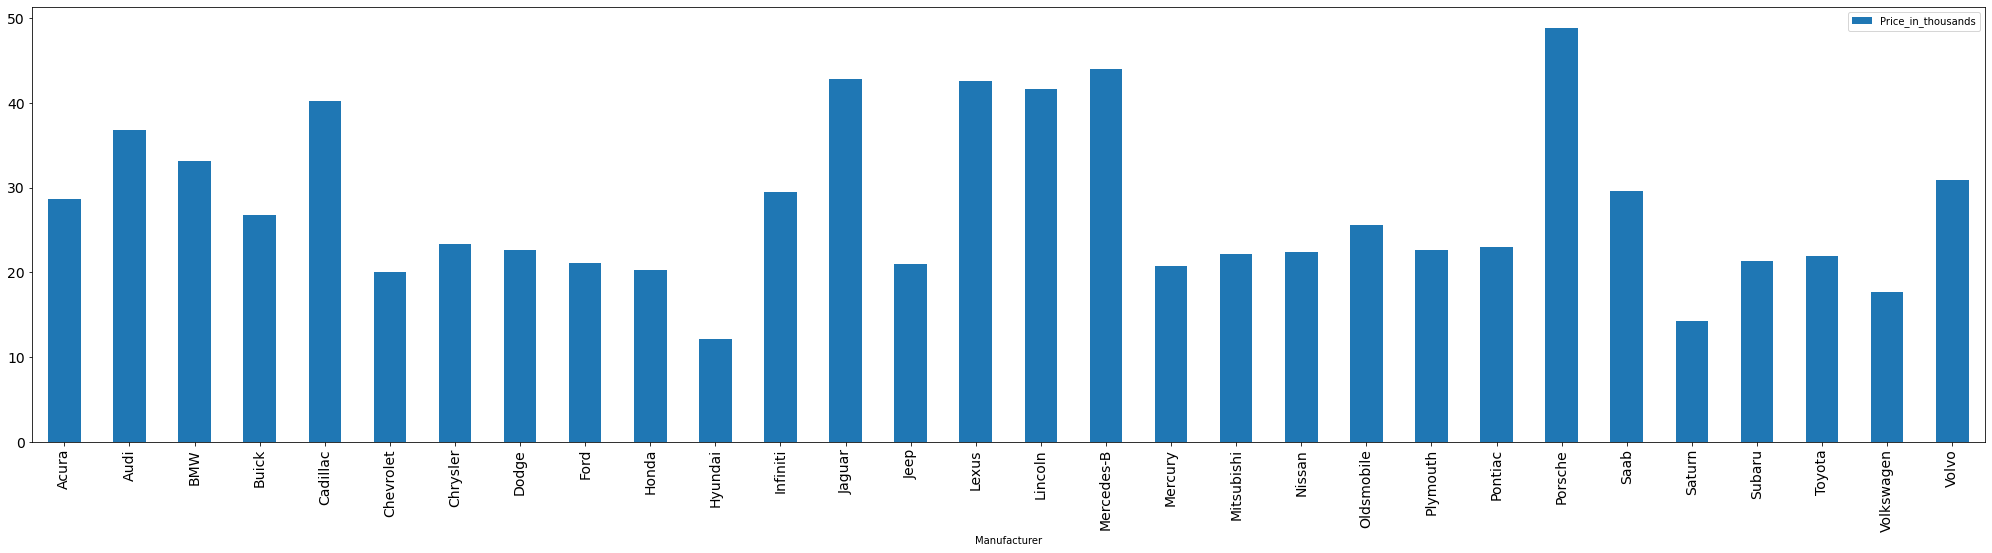

In [30]:
mean_price_manufacturer.plot(kind="bar", figsize=[35, 8], fontsize = 14)

In [31]:
#бачимо по графіку, але і можемо вивести аналітично, у якої марки найвища середня ціна авто
mean_price_manufacturer.idxmax()

Price_in_thousands    Porsche
dtype: object

#### Vehicle_type

In [32]:
vehicle_count = carsales.agg({'Vehicle_type': "value_counts"})
vehicle_count

,Vehicle_type
Passenger,116
Car,41


<AxesSubplot:title={'center':'Vehicle_type'}>

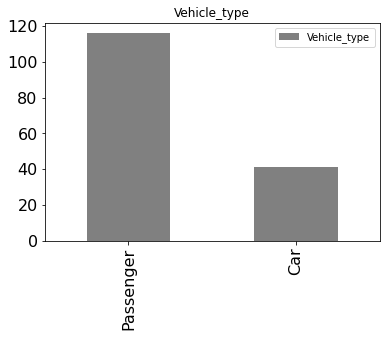

In [33]:
vehicle_count.plot(kind="bar", color='grey', title='Vehicle_type', fontsize=16)

#### Bivariate Analysis

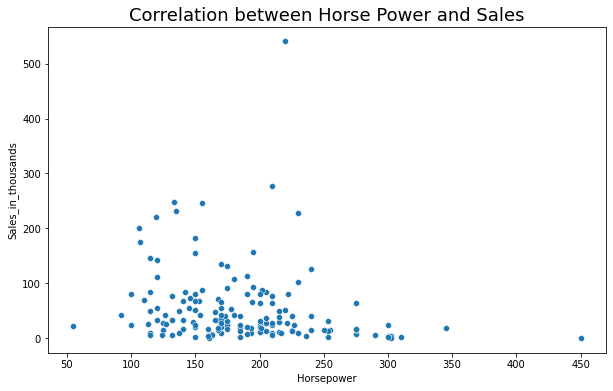

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Horsepower", y="Sales_in_thousands", data=carsales)
plt.title("Correlation between Horse Power and Sales", size=18)
plt.show()

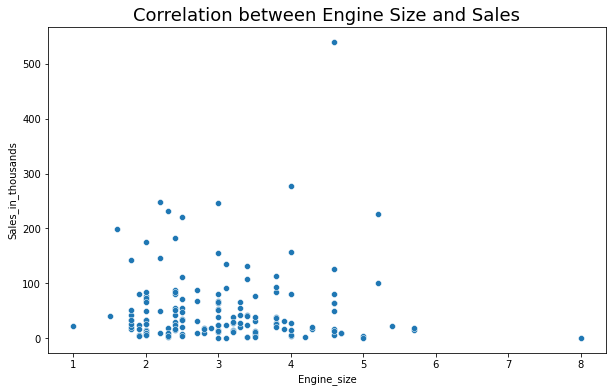

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Engine_size", y="Sales_in_thousands", data=carsales)
plt.title("Correlation between Engine Size and Sales", size=18)
plt.show()

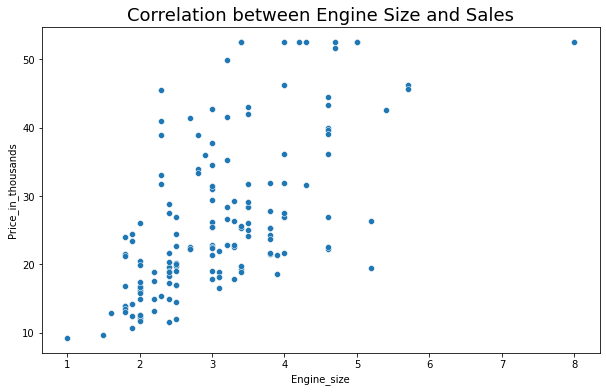

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Engine_size", y="Price_in_thousands", data=carsales)
plt.title("Correlation between Engine Size and Sales", size=18)
plt.show()

#### Univariate Analysis

C:\Users\nasty\AppData\Local\Temp\ipykernel_16724\2957885245.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price, color="r")


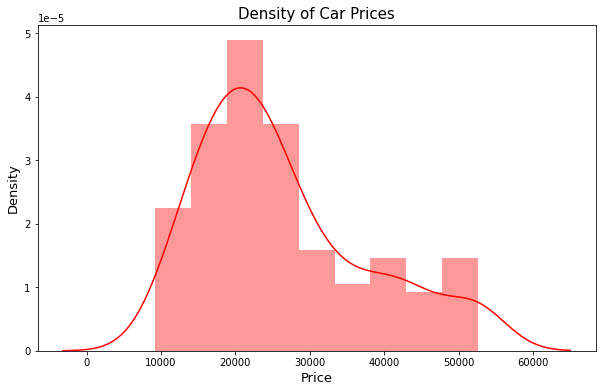

In [37]:
price = carsales["Price_in_thousands"]*1000
plt.figure(figsize=(10, 6))
sns.distplot(price, color="r")
plt.title("Density of Car Prices", size=15)
plt.xlabel("Price", size=13)
plt.ylabel("Density", size=13)
plt.show()

C:\Users\nasty\AppData\Local\Temp\ipykernel_16724\382840575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price, color="r")


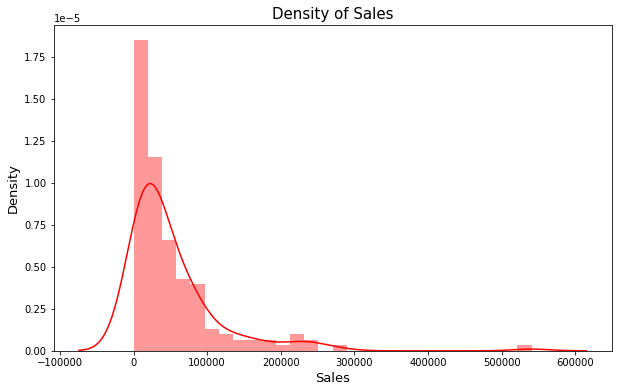

In [38]:
price = carsales["Sales_in_thousands"]*1000
plt.figure(figsize=(10, 6))
sns.distplot(price, color="r")
plt.title("Density of Sales", size=15)
plt.xlabel("Sales", size=13)
plt.ylabel("Density", size=13)
plt.show()

C:\Users\nasty\AppData\Local\Temp\ipykernel_16724\56599043.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(price, color="r")


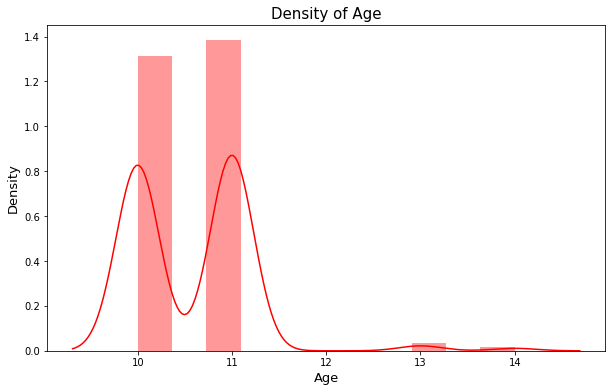

In [39]:
price = carsales["Age"]
plt.figure(figsize=(10, 6))
sns.distplot(price, color="r")
plt.title("Density of Age", size=15)
plt.xlabel("Age", size=13)
plt.ylabel("Density", size=13)
plt.show()